### Milestone Action Items

1. Go through the Introductory Tutorials on Matplotlib.
2. Using the same data set and results that you were working with in the pandas action items section (Day 4), 
* create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
* histogram of the log of the average total savings.
* line plot of the total jobs created for each month.
3. If you have time, take a look at this short tutorial on Altair.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [85]:
#vecsp_2020 = pd.read_csv('drive/MyDrive/Colab Notebooks/TDI/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
vecsp_2020 = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [133]:
NTAs = vecsp_2020.groupby(['NTA']).filter(lambda x: x['Company Name'].count()>4).groupby(['NTA']).aggregate({'Company Name':['count'], 'Total Savings':['mean'], 'Job created':['sum']}).reset_index()
print(NTAs)
print(NTAs.dtypes)

                                                 NTA Company Name  \
                                                            count   
0                  Battery Park City-Lower Manhattan            9   
1                                     Bushwick South           10   
2           Carroll Gardens-Columbia Street-Red Hook           11   
3                                      College Point            7   
4                                Crown Heights North            9   
5   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill           10   
6                                      East New York            9   
7                                  East Williamsburg           11   
8                                         Greenpoint           14   
9               Hunters Point-Sunnyside-West Maspeth           75   
10                                       Hunts Point           13   
11                                    Manhattanville            9   
12                                

Text(0, 0.5, 'Average Total Savings (U.S. dollars)')

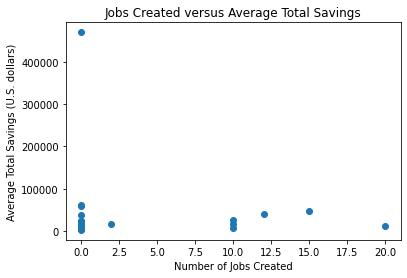

In [111]:
fig, ax1 = plt.subplots()
ax1.scatter(NTAs['Job created'],NTAs['Total Savings'])
ax1.set_title("Jobs Created versus Average Total Savings")
ax1.set_xlabel("Number of Jobs Created")
ax1.set_ylabel("Average Total Savings (U.S. dollars)")

Text(0, 0.5, 'Average Total Savings (U.S. dollars)')

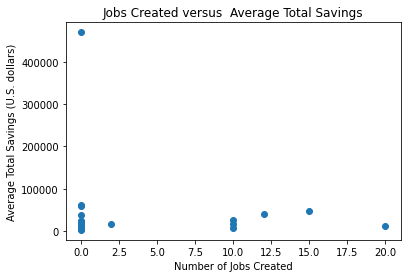

In [112]:
fig, ax2 = plt.subplots()
ax2.scatter('Job created','Total Savings', data=NTAs)
ax2.set_title("Jobs Created versus  Average Total Savings")
ax2.set_xlabel("Number of Jobs Created")
ax2.set_ylabel("Average Total Savings (U.S. dollars)")

Text(0, 0.5, 'Average Total Savings (U.S. dollars)')

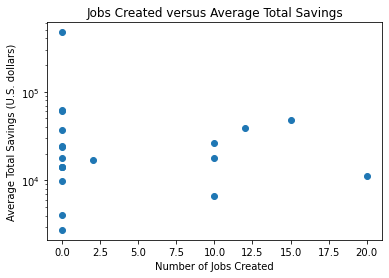

In [113]:
plt.figure()
plt.scatter('Job created','Total Savings', data=NTAs)
plt.yscale('log')
plt.title("Jobs Created versus Average Total Savings")
plt.xlabel("Number of Jobs Created")
plt.ylabel("Average Total Savings (U.S. dollars)")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40781699d0>]],
      dtype=object)

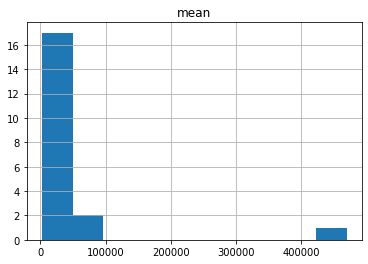

In [123]:
#plt.figure()
NTAs['Total Savings'].hist()

(array([17.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2760.88888889,  49473.87966667,  96186.87044444, 142899.86122222,
        189612.852     , 236325.84277778, 283038.83355556, 329751.82433333,
        376464.81511111, 423177.80588889, 469890.79666667]),
 <a list of 10 Patch objects>)

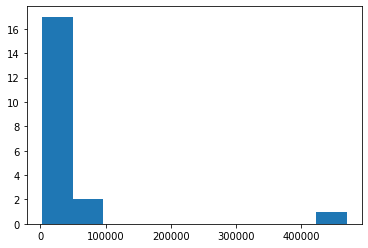

In [137]:
plt.hist(NTAs['Total Savings']["mean"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4078056490>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

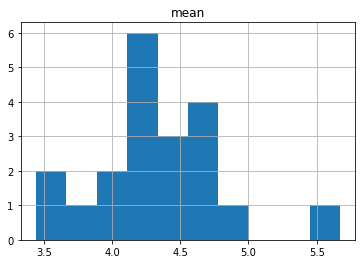

In [124]:
plt.figure()
log_ts = np.log10(NTAs['Total Savings'])
log_ts.hist()


(array([2., 1., 2., 6., 3., 4., 1., 0., 0., 1.]),
 array([3.44104893, 3.66414373, 3.88723853, 4.11033333, 4.33342813,
        4.55652293, 4.77961773, 5.00271254, 5.22580734, 5.44890214,
        5.67199694]),
 <a list of 10 Patch objects>)

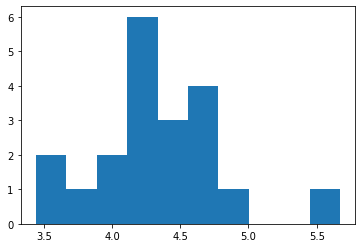

In [138]:
plt.hist(log_ts["mean"])

Text(0, 0.5, 'Total Number of Job Created')

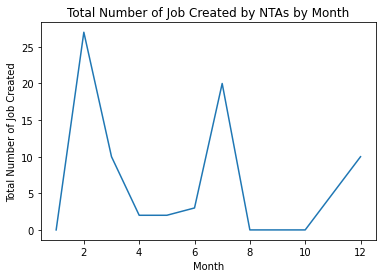

In [98]:
tjcm = vecsp_2020.groupby(['NTA']).filter(lambda x: x['Company Name'].count()>4).groupby(pd.to_datetime(vecsp_2020['Effective Date'],infer_datetime_format=True).dt.month)['Job created'].sum()
plt.figure()
plt.plot(tjcm)
plt.title('Total Number of Job Created by NTAs by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Job Created')

Questions:

1. The only column related to date is the "Effective Date". What should we use to get "Job_created" for each month?